# Loops figure

In [1]:
import scipy
import sklearn
import elpigraph
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import stream2 as st2
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def get_tp(gene_list,vars_bool):
    ''' Return % of true positives '''
    tp_score = []
    perc_detected = []
    for i,n in enumerate(vars_bool.index):
        if n in gene_list: 
            vars_bool[n] = True
        perc_detected.append(sum(vars_bool[:n])/len(gene_list))
        tp_score.append(sum(vars_bool[:n])/(i+1))
    return perc_detected, tp_score

def plot_tp(fname,gene_list,vars_bools):
    ''' Plot true positives '''
    plt.rcParams.update({'font.size': 15})
    fig, axs = plt.subplots(3,1,figsize=(5,10),sharex=True,constrained_layout=True)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for i in range(3):
        ax1 = axs[i]
        perc_detected, tp_score = get_tp(gene_list,vars_bools[i])

        ax1.plot(perc_detected,label='Fraction of markers found',c=colors[1])
        ylim=ax1.get_ylim()
        ax1.plot(tp_score,label='True positives / Total tested',c=colors[0])
        ax1.set_ylim(ylim)
        
        ax2 = ax1.twinx()
        ax2.plot(np.array(perc_detected)*len(gene_list),alpha=0,c=colors[0])

        if i==0: ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4))
        if i==2: ax1.set_xlabel('Markers rank',fontsize=20)
            
        ax2.set_ylabel('Number',fontsize=20,rotation=270,labelpad=20)
        ax1.set_ylabel('Fraction',fontsize=20)
        ax1.xaxis.set_minor_locator(MultipleLocator(100))

    plt.tight_layout()
    plt.savefig(fname,dpi=300,bbox_inches="tight")
    plt.show()

# Load data
We directly load data preprocessed as in Kharchenko 2021. 
Uncomment the cell below if you wish to replicate preprocessing yourself

In [2]:
data_path='../data/retina/retina.h5ad'
adata=sc.read(data_path)

In [3]:
#!wget -r -nH --cut-dirs=5 -R raw_count_matrix.mtx,RData,gif,index.html* -P ../data/ http://pklab.med.harvard.edu/peterk/review2020/examples/retina/scvelo/p2export/#data_path='../data/retinal_cells/retina/scvelo/p2export/'

#data_path = ../data/
#gene_df = pd.read_csv(data_path + "genes.csv")
#
#metadata = pd.read_csv(data_path + "metadata.csv")
#metadata.index = metadata.CellId
#del metadata["CellId"]
#
#x = sc.read_mtx(data_path + "spliced_count_matrix.mtx")
#y = sc.read_mtx(data_path + "unspliced_count_matrix.mtx")
#
#adata=x;
#adata.layers['spliced'] = x.X
#adata.layers['unspliced']= y.X
#del x,y
#
#metadata=metadata.astype({'Clusters': 'category', 'Annotation':'category'})
#adata.var_names = gene_df["gene"].values
#adata.obs_names = metadata.index.values
#adata.obs = metadata.copy()
#ann_pal = ["#AB29CCFF","#ABCC29FF","#296ACCFF","#29CC6AFF","#CC2929FF"]
#
#scv.pp.filter_genes(adata, min_shared_counts=20)
#scv.pp.normalize_per_cell(adata,enforce=True)
#scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
#scv.pp.log1p(adata)
#scv.tl.score_genes_cell_cycle(adata)
#
#sc.pp.pca(adata)
#sc.pp.neighbors(adata,metric='cosine',n_neighbors=30)
#sc.tl.umap(adata,n_components=3,min_dist=.3)
#
##adata.write('../data/retina.h5ad')

In [8]:
data_path = '../../../STREAM2/data/retinal_cells/retina/scvelo/p2export/'
gene_df = pd.read_csv(data_path + "genes.csv")

metadata = pd.read_csv(data_path + "metadata.csv")
metadata.index = metadata.CellId
del metadata["CellId"]

x = sc.read_mtx(data_path + "spliced_count_matrix.mtx")
y = sc.read_mtx(data_path + "unspliced_count_matrix.mtx")

adata=x;
adata.layers['spliced'] = x.X
adata.layers['unspliced']= y.X
del x,y

metadata=metadata.astype({'Clusters': 'category', 'Annotation':'category'})
adata.var_names = gene_df["gene"].values
adata.obs_names = metadata.index.values
adata.obs = metadata.copy()
ann_pal = ["#AB29CCFF","#ABCC29FF","#296ACCFF","#29CC6AFF","#CC2929FF"]

scv.pp.filter_genes(adata, min_shared_counts=20)
adata.layers['X_raw']=adata.X.copy()
scv.pp.normalize_per_cell(adata,enforce=True)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)
scv.tl.score_genes_cell_cycle(adata)

sc.pp.pca(adata)
sc.pp.neighbors(adata,metric='cosine',n_neighbors=30)
sc.tl.umap(adata,n_components=3,min_dist=.3)

#adata.write('../data/retina.h5ad')

Filtered out 25381 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


/home/jo/anaconda3/envs/stream2/lib/python3.8/site-packages/numba/core/consts.py:114: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return getattr(value, expr.attr)
/home/jo/anaconda3/envs/stream2/lib/python3.8/site-packages/numba/core/ir_utils.py:2097: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

In [10]:
sc.tl.umap(adata,n_components=2,min_dist=.3)

# Default trajectories

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...
Searching potential loops...
Using default parameters: max_n_points=inf, radius=3.52, min_node_n_points=6, min_path_len=10, nnodes=6
testing 4 candidates
Maximum number of iterations ( 10 ) has been reached. diff =  0.025331739453686997
Found no valid path to add


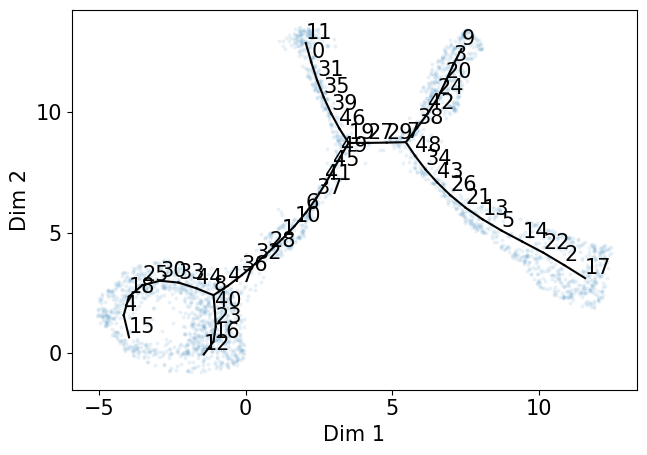

In [11]:
adata.obsm['X_dr']=adata.obsm['X_umap']
st2.tl.seed_graph(adata,n_clusters=30)
st2.tl.learn_graph(adata,n_nodes=50,store_evolution=True)
st2.pl.graph(adata,show_text=1,alpha=.1)
#st2.tl.find_paths(adata,max_inner_fraction=.2, max_n_points=np.inf,verbose=1)
st2.tl.find_paths(adata,max_inner_fraction=.25, max_n_points=np.inf,verbose=1)

(3, 3)
(54, 3)


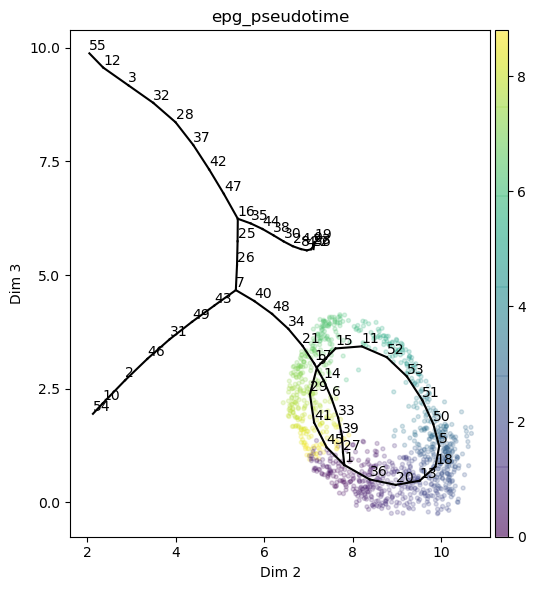

In [5]:
#st2.tl.add_path(adata,11,5,refit_graph=True)
#st2.tl.extend_leaves(adata,Mode='WeightedCentroid',ControlPar=.6)
#st2.tl.infer_pseudotime(adata,1,45,nodes_to_include=[36])
#st2.pl.graph(adata,comp1=2,comp2=3,show_text=1,fig_size=(5,6),color=['epg_pseudotime'],alpha=0.2)

In [13]:
st2.tl.add_path(adata,12,15,refit_graph=True)
st2.tl.extend_leaves(adata,Mode='WeightedCentroid',ControlPar=.6)
st2.tl.infer_pseudotime(adata,8,40,nodes_to_include=[15])
st2.pl.graph(adata,comp1=1,comp2=2,show_text=1,fig_size=(5,6),color=['epg_pseudotime'],alpha=0.2)

(3, 2)
(54, 2)


IndexError: index 2 is out of bounds for axis 1 with size 2

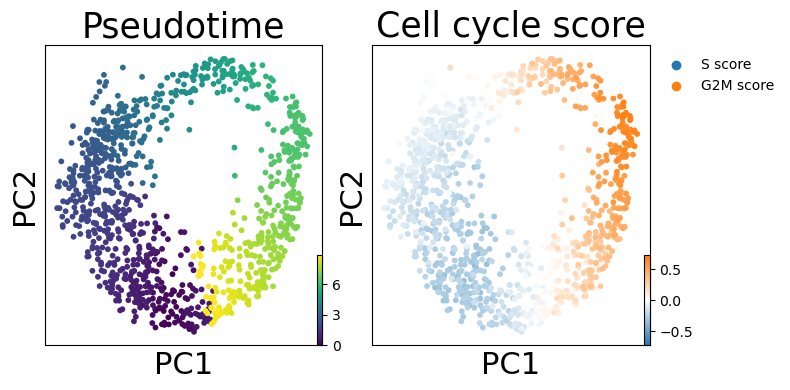

In [6]:
_adata = adata[np.isfinite(adata.obs['epg_pseudotime'])].copy()
_adata.obsm['X_pca'] = Xpca = sklearn.decomposition.PCA(2).fit_transform(_adata.obsm['X_dr'])

f,axs=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
scv.pl.scatter(_adata, basis='X_pca',color='epg_pseudotime', smooth=False, #perc=[5, 95],
               colorbar=True,frameon=1, size=70,alpha=1,dpi=300,ax=axs[0],show=False)

scv.pl.scatter(_adata, basis='X_pca',color_gradients=['S_score', 'G2M_score'], smooth=True, #perc=[5, 95],
               colorbar=True,frameon=1, size=70,alpha=1,dpi=300,ax=axs[1],show=False)
ax=axs[0]
ax.set_xlabel("PC1",fontsize=22)
ax.set_ylabel("PC2",fontsize=22)
ax.set_xticks([])
ax.set_yticks([])
#ax.locator_params(axis="x", nbins=5)
#ax.locator_params(axis="y", nbins=5)
#ax.tick_params(axis="both", labelbottom=True, labelleft=True)
ax.set_title('Pseudotime',fontsize=25)

ax=axs[1]
ax.set_xlabel("PC1",fontsize=22)
ax.set_ylabel("PC2",fontsize=22)
ax.set_title('Cell cycle score',fontsize=25)


plt.tight_layout()
plt.savefig("figures/retina/retina_cycle_scatter.png",dpi=300,bbox_inches='tight')
plt.savefig("figures/retina/retina_cycle_scatter.pdf",dpi=300,bbox_inches='tight')
plt.show()

/home/jo/anaconda3/envs/stream2/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/jo/anaconda3/envs/stream2/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


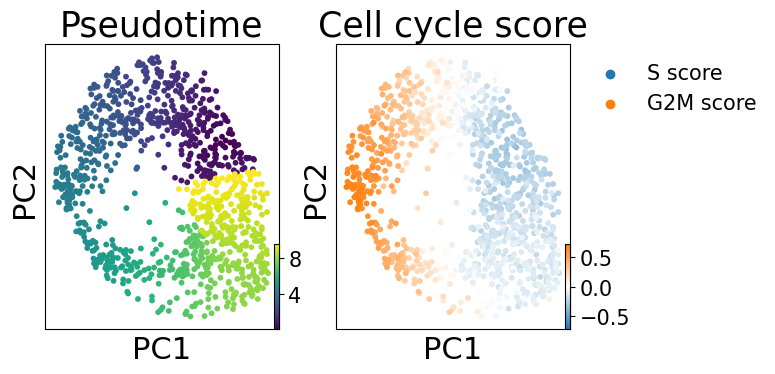

In [20]:
_adata = adata[np.isfinite(adata.obs['epg_pseudotime'])].copy()

f,axs=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
scv.pl.scatter(_adata, basis='X_umap',color='epg_pseudotime', smooth=False, #perc=[5, 95],
               colorbar=True,frameon=1, size=70,alpha=1,dpi=300,ax=axs[0],show=False)

scv.pl.scatter(_adata, basis='X_umap',color_gradients=['S_score', 'G2M_score'], smooth=True, #perc=[5, 95],
               colorbar=True,frameon=1, size=70,alpha=1,dpi=300,ax=axs[1],show=False)
ax=axs[0]
ax.set_xlabel("PC1",fontsize=22)
ax.set_ylabel("PC2",fontsize=22)
ax.set_xticks([])
ax.set_yticks([])
#ax.locator_params(axis="x", nbins=5)
#ax.locator_params(axis="y", nbins=5)
#ax.tick_params(axis="both", labelbottom=True, labelleft=True)
ax.set_title('Pseudotime',fontsize=25)

ax=axs[1]
ax.set_xlabel("PC1",fontsize=22)
ax.set_ylabel("PC2",fontsize=22)
ax.set_title('Cell cycle score',fontsize=25)


plt.tight_layout()
#plt.savefig("figures/retina/retina_cycle_scatter.png",dpi=300,bbox_inches='tight')
#plt.savefig("figures/retina/retina_cycle_scatter.pdf",dpi=300,bbox_inches='tight')
plt.show()

In [79]:
#----- get cycle data, cycle genes that are expressed 
_adata=adata[np.isfinite(adata.obs['epg_pseudotime'])].copy()
_adata.X=_adata.X.toarray()
_adata.var_names=adata.var_names.map(lambda s:s.upper())
#sc.external.pp.magic(_adata,verbose=1)

cc_genes = ['ACYP1', 'ALG6', 'ANKRD32', 'ANLN', 'ANP32E', 'APEX2', 'APOBEC3B','ARHGAP11A', 'ARHGAP11B', 'ARHGAP19', 'ARHGEF39', 'ARL6IP1','ARL6IP6', 'ASF1B', 'ASPM', 'ATAD2', 'ATAD5', 'AURKA', 'AURKB','BARD1', 'BIRC5', 'BLM', 'BORA', 'BRCA1', 'BRCA2', 'BRD8', 'BRIP1','BUB1', 'BUB1B', 'BUB3', 'C11orf82', 'C15orf23', 'C18orf54','C19orf48', 'C1orf112', 'C20orf72', 'C3orf14', 'C4orf21','C4orf46', 'CASC5', 'CASP2', 'CASP8AP2', 'CCDC14', 'CCDC15','CCDC150', 'CCDC18', 'CCDC34', 'CCDC77', 'CCNA2', 'CCNB1', 'CCNB2','CCND1', 'CCND2', 'CCND3', 'CCNE1', 'CCNE2', 'CCNF', 'CCNH','CCP110', 'CDC20', 'CDC25A', 'CDC25B', 'CDC25C', 'CDC45', 'CDC6','CDC7', 'CDCA2', 'CDCA3', 'CDCA4', 'CDCA5', 'CDCA7', 'CDCA7L','CDCA8', 'CDK1', 'CDK2', 'CDK4', 'CDK5RAP2', 'CDK6', 'CDK7','CDKN1A', 'CDKN1B', 'CDKN1C', 'CDKN2A', 'CDKN2B', 'CDKN2C','CDKN2D', 'CDKN3', 'CENPA', 'CENPE', 'CENPF', 'CENPI', 'CENPJ','CENPK', 'CENPL', 'CENPM', 'CENPN', 'CENPO', 'CENPQ', 'CEP128','CEP152', 'CEP44', 'CEP55', 'CEP70', 'CEP78', 'CHAC2', 'CHAF1A','CHAF1B', 'CHEK1', 'CIT', 'CKAP2', 'CKAP2L', 'CKAP5', 'CKS1B','CKS2', 'CLSPN', 'CNTRL', 'CSE1L', 'CSRP2', 'CTD-2510F5.4','CTDSPL2', 'CTPS1', 'DARS2', 'DAXX', 'DBF4', 'DCK', 'DCLRE1B','DCP2', 'DCTPP1', 'DDB2', 'DDX11', 'DDX12P', 'DDX39A', 'DEK','DEPDC1', 'DEPDC1B', 'DERA', 'DHCR24', 'DHFR', 'DIAPH3', 'DLGAP5','DNA2', 'DNAJC9', 'DNMT1', 'DONSON', 'DSN1', 'DTL', 'DTYMK', 'DUT','E2F1', 'E2F2', 'E2F4', 'E2F5', 'E2F7', 'ECT2', 'EED', 'EMC9','EME1', 'ENOSF1', 'ERCC6L', 'ERLIN1', 'ESCO2', 'ESPL1', 'EXO1','EXOSC8', 'EXOSC9', 'EZH2', 'FAM111A', 'FAM111B', 'FAM122B','FAM161A', 'FAM178A', 'FAM54A', 'FAM64A', 'FAM72D', 'FAM83D','FANCA', 'FANCB', 'FANCD2', 'FANCI', 'FANCL', 'FBXO4', 'FBXO5','FEN1', 'FGFR1OP', 'FIGNL1', 'FKBP5', 'FN3KRP', 'FOXM1', 'FOXRED2','G2E3', 'GAS2L3', 'GEN1', 'GGCT', 'GGH', 'GINS1', 'GINS2', 'GINS3','GINS4', 'GJC1', 'GMNN', 'GOT1', 'GPSM2', 'GTSE1', 'H2AFV','H2AFX', 'H2AFZ', 'HADH', 'HAT1', 'HAUS1', 'HAUS5', 'HAUS6','HAUS8', 'HELLS', 'HIRIP3', 'HIST1H1B', 'HIST1H4C', 'HJURP','HMGB2', 'HMGB3', 'HMGN2', 'HMGXB4', 'HMMR', 'HNRNPF', 'HPRT1','HSD17B11', 'HSPB11', 'INCENP', 'INSR', 'IQGAP3', 'ITGB3BP','IVNS1ABP', 'KDELC2', 'KIAA0101', 'KIAA0586', 'KIAA1524','KIAA1731', 'KIF11', 'KIF14', 'KIF15', 'KIF18A', 'KIF18B','KIF20A', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A', 'KIFC1','KNTC1', 'KPNA2', 'LIG1', 'LIN9', 'LRR1', 'MAD2L1', 'MASTL','MBOAT1', 'MCM10', 'MCM2', 'MCM3', 'MCM4', 'MCM5', 'MCM6', 'MCM7','MCM8', 'MCMBP', 'MDM1', 'MELK', 'MIS18A', 'MIS18BP1', 'MKI67','MLF1IP', 'MMS22L', 'MNAT1', 'MND1', 'MNS1', 'MPHOSPH9', 'MRE11A','MSH2', 'MSH6', 'MTBP', 'MTHFD1', 'MYBL2', 'MYO19', 'MZT1', 'NASP','NCAPD2', 'NCAPD3', 'NCAPG', 'NCAPG2', 'NCAPH', 'NDC80', 'NDE1','NEDD1', 'NEIL3', 'NEK2', 'NETO2', 'NPAT', 'NR2C2AP', 'NRM','NUDT1', 'NUF2', 'NUP107', 'NUP155', 'NUP205', 'NUP35', 'NUP62','NUP85', 'NUSAP1', 'ODF2', 'OGN', 'OIP5', 'OMD', 'ORC1', 'ORC6','PARP1', 'PARP2', 'PARPBP', 'PAX6', 'PBK', 'PCNA', 'PDLIM3','PHF19', 'PHGDH', 'PHIP', 'PHTF2', 'PIF1', 'PKNOX1', 'PLK1','PLK4', 'PLSCR1', 'PMS1', 'POC1A', 'POLA1', 'POLA2', 'POLD3','POLE', 'POLE2', 'POLQ', 'POLR3K', 'PRC1', 'PRIM1', 'PRIM2','PRPF4', 'PRPS2', 'PRR11', 'PSIP1', 'PSMC3IP', 'PSRC1', 'PTTG1','RACGAP1', 'RAD1', 'RAD18', 'RAD21', 'RAD51', 'RAD51AP1', 'RAD51C','RAD54L', 'RANGAP1', 'RB1', 'RBBP8', 'RBL1', 'RECQL', 'RFC2','RFC3', 'RFC4', 'RFC5', 'RFWD3', 'RHNO1', 'RMI1', 'RMI2','RNASEH2A', 'RNF26', 'RP11-303E16.2', 'RPA1', 'RPA2', 'RPA3','RRM1', 'RRM2', 'RTKN2', 'SAPCD2', 'SASS6', 'SCLT1', 'SFI1','SGOL1', 'SGOL2', 'SHCBP1', 'SHMT1', 'SKA1', 'SKA2', 'SKA3','SKP2', 'SLBP', 'SLC20A1', 'SLC29A1', 'SLC43A3', 'SMC1A', 'SMC2','SMC4', 'SNHG1', 'SPAG5', 'SPC24', 'SPC25', 'SPDL1', 'SRSF2','STIL', 'STRA13', 'SYNE2', 'TACC3', 'TCF19', 'TDP1', 'TEX30','TFDP1', 'TIMELESS', 'TIMM21', 'TIPIN', 'TK1', 'TMEM106C','TMEM116', 'TMEM19', 'TMEM194A', 'TMEM38B', 'TMEM48', 'TMEM97','TMPO', 'TOP2A', 'TOP3A', 'TOPBP1', 'TPX2', 'TRAIP', 'TREX1','TRIM45', 'TRIP13', 'TROAP', 'TTF2', 'TTI1', 'TTK', 'TUBA1C','TUBB4B', 'TUBB6', 'TUBG1', 'TYMS', 'UBE2C', 'UBE2T', 'UBR7','UHRF1', 'UNG', 'USP1', 'USP37', 'VRK1', 'VSIG10', 'WDHD1','WDR76', 'WDYHV1', 'WEE1', 'WHSC1', 'XRCC2', 'YEATS4', 'ZMYM1','ZNF107', 'ZNF367', 'ZNF519', 'ZNF738', 'ZNF93', 'ZWILCH', 'ZWINT','DSCC1', 'E2F8', 'HN1', 'LBR', 'CTCF', 'CBX5', 'ADAMTS1', 'C17orf75', 'C9orf40', 'CACYBP', 'CDT1', 'CENPU','CEP57', 'CREBZF', 'CRYL1', 'DSCC1', 'E2F8', 'EFCAB11', 'ENDOD1','ETAA1', 'EYA2', 'FANCE', 'FANCG', 'GLMN', 'GMPS', 'GPD2', 'HSF2','METTL9', 'MMD', 'MPP1', 'NSMCE4A', 'OSGEPL1', 'PAK1', 'PAQR4','PASK', 'PAXIP1', 'PBX3', 'PKMYT1', 'RAB23', 'RDX', 'SLC25A40','SMC3', 'SSX2IP', 'SUPT16H', 'THAP10', 'THEM6', 'TSPYL4','TUBGCP5', 'WRB', 'ZBTB14', 'ADGRE5', 'ARHGDIB', 'CDC27', 'CEP85', 'CTCF', 'DBF4B', 'DCAF7','FZD2', 'FZD7', 'FZR1', 'GTF2E1', 'HN1', 'JADE2', 'KIF5B', 'LBR','LMNB2', 'MET', 'METTL4', 'MTMR6', 'NDC1', 'NRF1', 'PAFAH2','PLEKHG3', 'PTTG3P', 'RASSF1', 'REEP4', 'SAP30', 'SLCO1B3','SOGA1', 'SPA17', 'STK17B', 'TAF5', 'TBC1D2', 'TBC1D31', 'TUBD1','UBE2S', 'VANGL1', 'XPO1']
cc_genes_present = np.array(cc_genes)[np.isin(cc_genes,_adata.var_names)]
#ccycle_63genes_KEGG = ['Abl1','Anapc1','Atm','Bub1','Bub1b','Bub3','Ccnb2','Ccnd1','Ccne1','Ccnh','Cdc14b','Cdc20','Cdc25a','Cdc25b','Cdc45','Cdc6','Cdc7','Cdh1','Cdk1','Cdk2','Cdk4','Cdkn1a','Cdkn1b','Cdkn2a','Cdkn2b','Cdkn2c','Cdkn2d','Chek1','Crebbp','Dbf4','E2f1','E2f4','Espl1','Gadd45a','Gsk3b','Hdac2','Mad1l1','Mad2l1','Mcm3','Mdm2','Myc','Orc1','Pcna','Pkmyt1','Plk1','Prkdc','Pttg1','Rad21','Rb1','Rbl1','Sfn','Skp2','Smad2','Smad4','Smc1a','Smc3','Stag1','Tfdp1','Tgfb1','Trp53','Ttk','Wee1','Zbztb17',]
#ccycle_63genes_KEGG = pd.Series(ccycle_63genes_KEGG).map(lambda s:s.upper())
#ccycle_63genes_KEGG_present = np.array(ccycle_63genes_KEGG)[np.isin(ccycle_63genes_KEGG,up_varnames)]



#----- detect markers

vars_bools = []

#---spearman
st2.tl.detect_transition_markers(_adata,fc_cutoff=0.,min_num_cells=5)
vars_retained = list(_adata.uns['transition_markers'].values())[0].index
cc_genes_present = np.array(cc_genes)[np.isin(cc_genes,vars_retained)]
_adata = _adata[:,vars_retained]

corr_spearman = np.abs(list(_adata.uns['transition_markers'].values())[0]['stat']).sort_values(ascending=False)
vars_bools.append(pd.Series(False,index=corr_spearman.index))

#---xi
st2.tl.detect_transition_markers(_adata,fc_cutoff=0.,min_num_cells=5,method='xi')
corr_xi = list(_adata.uns['transition_markers'].values())[0]['stat'].sort_values(ascending=False)
vars_bools.append(pd.Series(False,index=corr_xi.index))

#---residuals
cycle_nodep = _adata.uns['epg']['node_pos'][_adata.obs['epg_node_id'].unique()]
means, residue_matrix, r2scores, ind = elpigraph.utils.residuals(_adata.X, _adata.obsm['X_dr'], cycle_nodep)

corr_var = pd.Series(r2scores,index=_adata.var_names).sort_values(ascending = False)
vars_bools.append(pd.Series(False,index=corr_var.index))


#--- NB GAM
import diffxpy.api as de
_adata2=_adata.copy()
_adata2.obs['time']=adata.obs['epg_pseudotime']
_adata2.X=_adata.layers['X_raw'].toarray()
df = de.test.continuous_1d(data=_adata2.X,sample_description=_adata2.obs,gene_names=_adata2.var_names,
                           formula_loc="~ 1 + time",formula_scale="~ 1",factor_loc_totest="time",continuous="time",df=4
                          ).summary().sort_values('qval')
df.index=df.gene
vars_bools.append(pd.Series(False,index=df.index))

#---- plot
plot_tp('figures/retina/retina_markers.png',cc_genes_present,vars_bools)
plot_tp('figures/retina/retina_markers.pdf',cc_genes_present,vars_bools)

1036 Cells are selected for Path_Source_Nodes-to-include_Target :  Path_8-[15]-40
Filtering out markers that are expressed in less than 5 cells ...
1887 markers are being scanned ...
1036 Cells are selected for Path_Source_Nodes-to-include_Target :  Path_8-[15]-40
Filtering out markers that are expressed in less than 5 cells ...
1887 markers are being scanned ...


ValueError: parameter continuous not found in sample_description

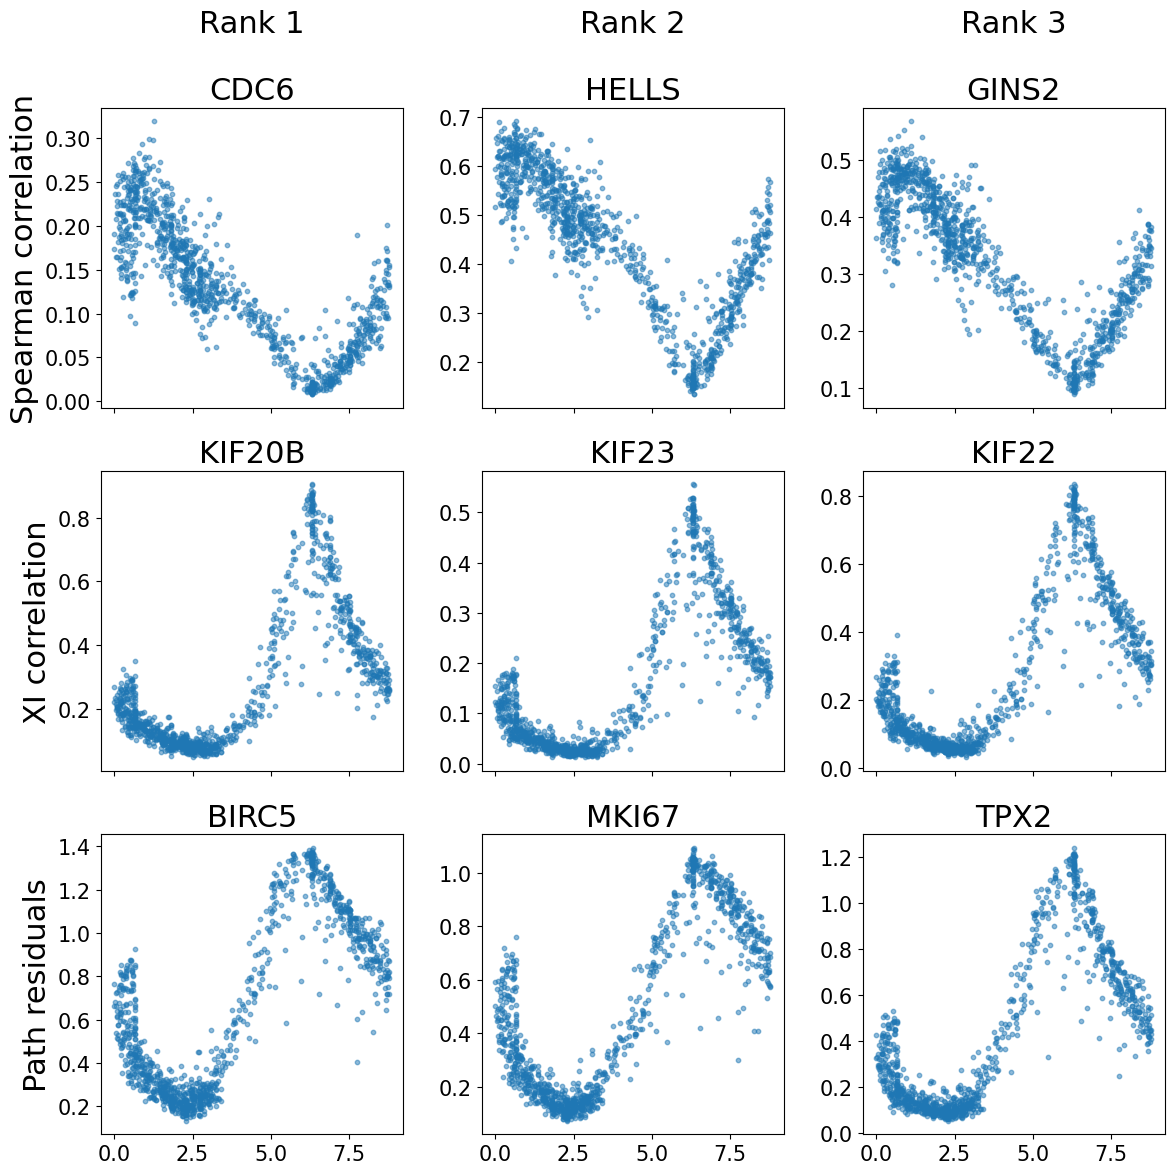

In [8]:
fig, ax = plt.subplots(3,3,figsize=(12,12),sharex=True)

corrs = [corr_spearman, corr_xi, corr_var]
names = ['Spearman correlation', 'XI correlation', 'Path residuals']
for ix,name,corr in zip(range(3),names,corrs):
    for i,c in enumerate(corr.index[:3]):
        _c = _adata.var_names[_adata.var_names==c][0]
        #ax[ix,i].set_title(f'{_c}'+' ('+str(round(corr[c],2))[1:]+')',fontsize=22)
        if i==0: 
            ax[ix,i].set_ylabel(name,fontsize=22)
        if ix==0:
            ax[ix,i].set_title(f'Rank '+str(i+1)+f'\n\n{_c}',fontsize=22)
        else:
            ax[ix,i].set_title(f'{_c}',fontsize=22)
        ax[ix,i].scatter(_adata.obs['epg_pseudotime'],_adata[:,_c].X,s=10,alpha=.5)
plt.tight_layout()
plt.savefig("figures/retina/retina_top3.png",dpi=300,bbox_inches="tight")
plt.savefig("figures/retina/retina_top3.pdf",dpi=300,bbox_inches="tight")
plt.show()

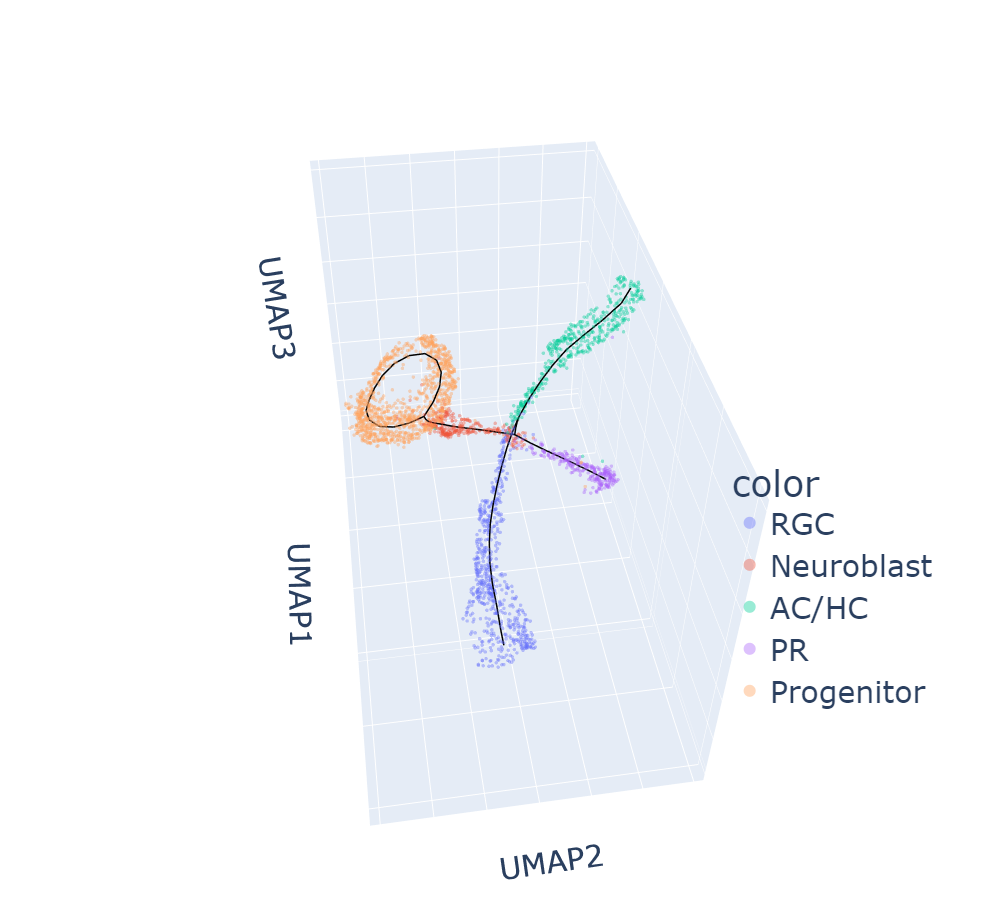

In [9]:
import plotly.express as px
import plotly.graph_objects as go

nodep, edges = adata.uns['epg']['node_pos'], adata.uns['epg']['edge']

fig=px.scatter_3d(x=adata.obsm['X_dr'][:,0],y=adata.obsm['X_dr'][:,1],z=adata.obsm['X_dr'][:,2],
                  #color=_anndata[:,'Mki67'].X.toarray().flat,
                  #color_continuous_scale='Greens',
                  color=adata.obs['Annotation'],)
fig.update_traces(marker=dict(size=2,opacity=.4))

for edge_i in edges:
    curve_i = np.concatenate((nodep[[edge_i[0]]], nodep[[edge_i[1]]]),axis=0).T
    fig.add_trace(go.Scatter3d(x=curve_i[0], y=curve_i[1], z=curve_i[2],
                               mode='lines',line=dict(color='black', width=3)))
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-2, y=.3, z=1.8)
)

fig.update_layout(height=900,width=1100,autosize=False,scene_camera=camera,
                  legend=dict(itemsizing='constant',yanchor="top",y=0.5,xanchor="right",x=.95,font=dict(size=30),bgcolor='rgba(0,0,0,0)'),
                  margin=dict( l=0,r=0, b=0,t=0, pad=0),
                  scene_xaxis_tickvals = np.linspace(np.min(adata.obsm['X_dr'][:,0]),np.max(adata.obsm['X_dr'][:,0]),7), scene_xaxis_ticktext = ['']*7,
                  scene_yaxis_tickvals = np.linspace(np.min(adata.obsm['X_dr'][:,1]),np.max(adata.obsm['X_dr'][:,1]),7), scene_yaxis_ticktext = ['']*7,
                  scene_zaxis_tickvals = np.linspace(np.min(adata.obsm['X_dr'][:,2]),np.max(adata.obsm['X_dr'][:,2]),7), scene_zaxis_ticktext = ['']*7,
                  scene_xaxis_title_text='UMAP1',scene_xaxis_title_font_size=30,
                  scene_yaxis_title_text='UMAP2',scene_yaxis_title_font_size=30,
                  scene_zaxis_title_text='UMAP3',scene_zaxis_title_font_size=30,  )
for trace in fig['data']: 
    if(trace.mode!='markers'): trace['showlegend'] = False
fig.write_image('figures/retina/retina_3d.png',scale=2,engine="kaleido")
fig.write_image('figures/retina/retina_3d.pdf',scale=2,engine="kaleido")
fig

# Comparison

In [1]:
from comparison_utils import *
%load_ext rpy2.ipython

def load_slingshot(res_path,slingshot_ncenters):
    %R -i res_path -i slingshot_ncenters
    %R path <- slingshot_ncenters
    curves_gmm = %R readRDS(paste(res_path,'slingshot_curves_gmm.rds',sep='_'))
    curves_kmeans = %R readRDS(paste(res_path,'slingshot_curves_kmeans',path,'.rds',sep='_'))
    cl1 = %R readRDS(paste(res_path,'slingshot_gmm.rds',sep='_'))
    cl2 = %R readRDS(paste(res_path,'slingshot_kmeans',path,'.rds',sep='_'))
    
    all_lineages = {}
    for n,curve in zip(['kmeans','GMM'],[curves_kmeans,curves_gmm]):
        lineages = dict(curve.items())
        for k,v in lineages.items():
            lineages[k] = dict(v.items())
            for k2,v2 in lineages[k].items():
                lineages[k][k2]=np.array(lineages[k][k2])
            lineages[k]['s']=lineages[k]['s'][lineages[k]['ord']-1]
        all_lineages[n]=lineages

    all_lineages['kmeans'] = [v['s'] for k,v in all_lineages['kmeans'].items()]
    all_lineages['GMM'] = [v['s'] for k,v in all_lineages['GMM'].items()]
    return all_lineages

def load_monocle(res_path,mcle_ncenters ,mcle_sigma,mcle_gamma):
    %R -i res_path -i mcle_ncenters -i mcle_sigma -i mcle_gamma
    path = %R path <- paste(mcle_ncenters,mcle_sigma,mcle_gamma,sep='_')
    path=path[0]
    nodep = %R readRDS(paste(res_path,'monocle_dp_mst',path,'.rds',sep='_'))
    nodep = np.array(nodep.T)
    stree = scipy.io.mmread(res_path+f'_monocle_stree_{path}_.mm')
    edges = np.argwhere(np.triu(stree.todense()))
    clus = %R readRDS(paste(res_path,'monocle_clus',path,'.rds',sep='_'))
    partitions = np.array(np.array(clus)[1])
    clusters = np.array(np.array(clus)[2])
    return nodep, stree, edges, partitions, clusters

def run_monocle_slingshot_tuned(data_path, res_path, slingshot_ncenters = 50,mcle_ncenters = 50,mcle_sigma = 0.01,mcle_gamma = 0.5,mcle_eps = 1e-05):
    ! /home/jo/anaconda3/envs/qz_monocle3/bin/Rscript run_monocle_slingshot_tuned.R $data_path $slingshot_ncenters $mcle_ncenters $mcle_sigma $mcle_gamma $mcle_eps $res_path
    
    lineages = load_slingshot(res_path,slingshot_ncenters)
    nodep, stree, edges, partitions, clusters = load_monocle(res_path,mcle_ncenters ,mcle_sigma ,mcle_gamma)
    return lineages, nodep, stree, edges, partitions, clusters

## Default trajectories


Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")

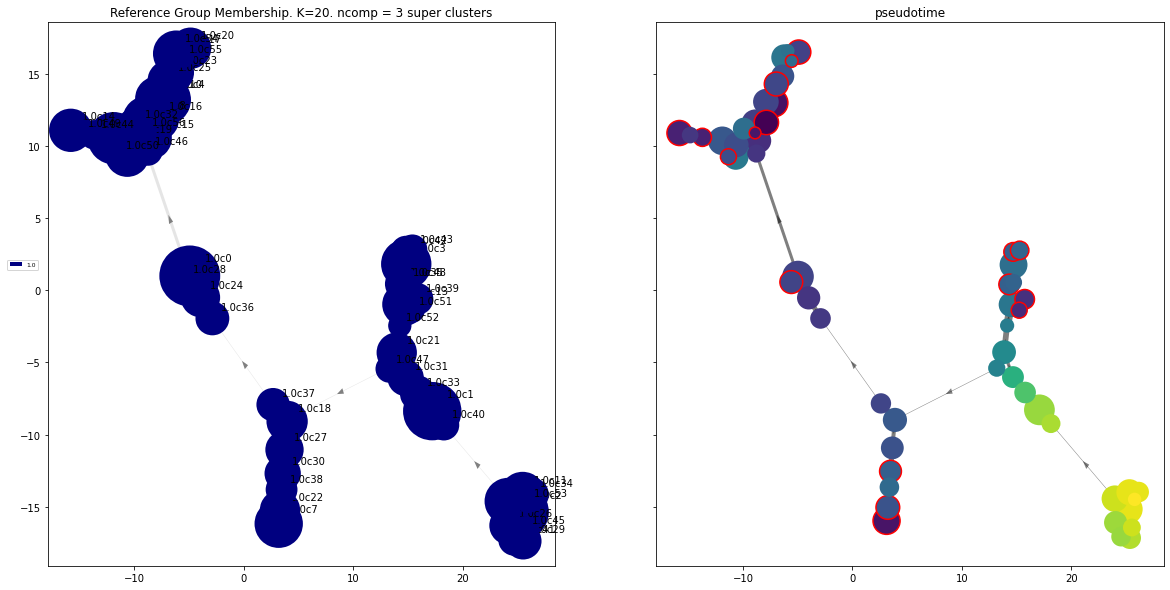

time elapsed 70.4 seconds
input data has shape 2726 (samples) x 3 (features)
time is Wed Dec  8 14:51:13 2021
commencing global pruning
Share of edges kept after Global Pruning 49.80 %
commencing community detection
time is Wed Dec  8 14:51:13 2021
100  clusters before handling small/big
There are 0 clusters that are too big
humanCD34 : global cluster graph pruning level 0.15
number of components before pruning 1
percentage links trimmed from local pruning relative to start 0.0
percentage links trimmed from global pruning relative to start 51.8
there are  1 components in the graph
root user [0]
start computing lazy-teleporting Expected Hitting Times
ended all multiprocesses, will retrieve and reshape
super_terminal_clusters [4, 7, 14, 16, 20, 22, 25, 28, 30, 35, 39, 42, 43, 44, 50, 51, 55, 56]
the sub terminal cluster that best captures the super terminal 44 is 46 but the pseudotime is too low
no sub cluster has majority made of super-cluster  55
terminal clus in this component [3, 6, 

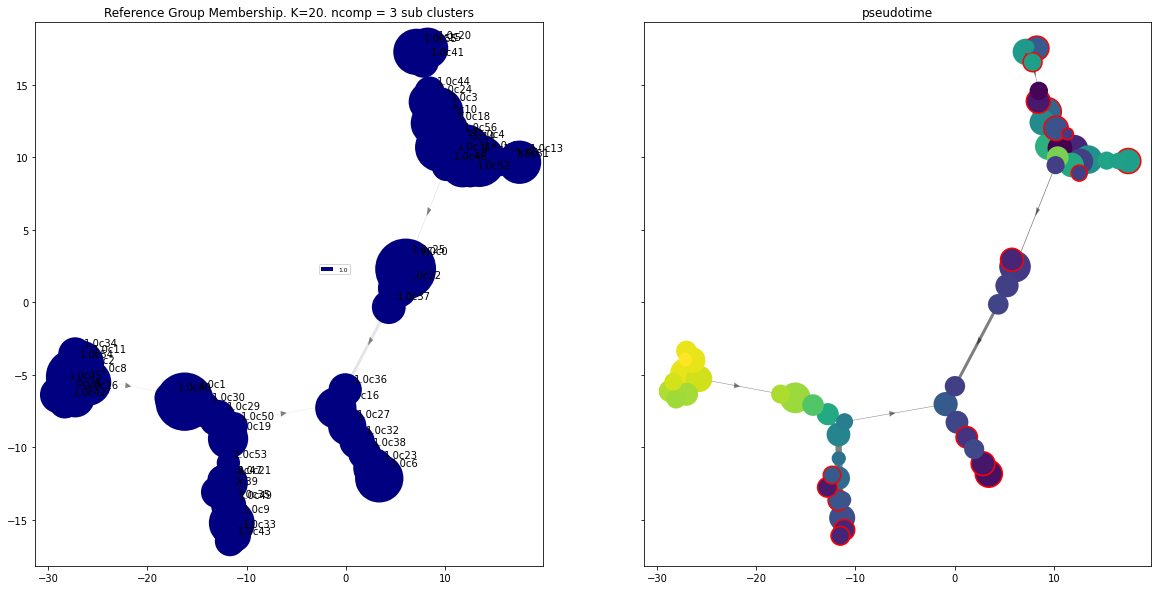

time elapsed 81.1 seconds
dict of terminal state pairs, Super: sub:  {4: 3, 7: 6, 14: 13, 16: 18, 20: 20, 22: 23, 25: 24, 28: 25, 30: 32, 35: 35, 39: 39, 42: 33, 43: 43, 50: 52, 51: 47, 55: 41, 56: 56}


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 4 is a super terminal with sub_terminal cluster 3
super cluster 7 is a super terminal with sub_terminal cluster 6
super cluster 14 is a super terminal with sub_terminal cluster 13
super cluster 16 is a super terminal with sub_terminal cluster 18
super cluster 20 is a super terminal with sub_terminal cluster 20
super cluster 22 is a super terminal with sub_terminal cluster 23
super cluster 25 is a super terminal with sub_terminal cluster 24
super cluster 28 is a super terminal with sub_terminal cluster 25
super cluster 30 is a super terminal with sub_terminal cluster 32
super cluster 35 is a super terminal with sub_terminal cluster 35
super cluster 39 is a super terminal with sub_terminal cluster 39
super cluster 42 is a super terminal with sub_terminal cluster 33
super cluster 43 is a super terminal with sub_terminal cluster 43
super cluster 50 is a super terminal with sub_terminal cluster 52
super cluster 51 is a super terminal with sub_terminal cluster 47
super cluster 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 4 is a super terminal with sub_terminal cluster 3
super cluster 7 is a super terminal with sub_terminal cluster 6
super cluster 14 is a super terminal with sub_terminal cluster 13
super cluster 16 is a super terminal with sub_terminal cluster 18
super cluster 20 is a super terminal with sub_terminal cluster 20
super cluster 22 is a super terminal with sub_terminal cluster 23
super cluster 25 is a super terminal with sub_terminal cluster 24
super cluster 28 is a super terminal with sub_terminal cluster 25
super cluster 30 is a super terminal with sub_terminal cluster 32
super cluster 35 is a super terminal with sub_terminal cluster 35
super cluster 39 is a super terminal with sub_terminal cluster 39
super cluster 42 is a super terminal with sub_terminal cluster 33
super cluster 43 is a super terminal with sub_terminal cluster 43
super cluster 50 is a super terminal with sub_terminal cluster 52
super cluster 51 is a super terminal with sub_terminal cluster 47
super cluster 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 4 is a super terminal with sub_terminal cluster 3
super cluster 7 is a super terminal with sub_terminal cluster 6
super cluster 14 is a super terminal with sub_terminal cluster 13
super cluster 16 is a super terminal with sub_terminal cluster 18
super cluster 20 is a super terminal with sub_terminal cluster 20
super cluster 22 is a super terminal with sub_terminal cluster 23
super cluster 25 is a super terminal with sub_terminal cluster 24
super cluster 28 is a super terminal with sub_terminal cluster 25
super cluster 30 is a super terminal with sub_terminal cluster 32
super cluster 35 is a super terminal with sub_terminal cluster 35
super cluster 39 is a super terminal with sub_terminal cluster 39
super cluster 42 is a super terminal with sub_terminal cluster 33
super cluster 43 is a super terminal with sub_terminal cluster 43
super cluster 50 is a super terminal with sub_terminal cluster 52
super cluster 51 is a super terminal with sub_terminal cluster 47
super cluster 

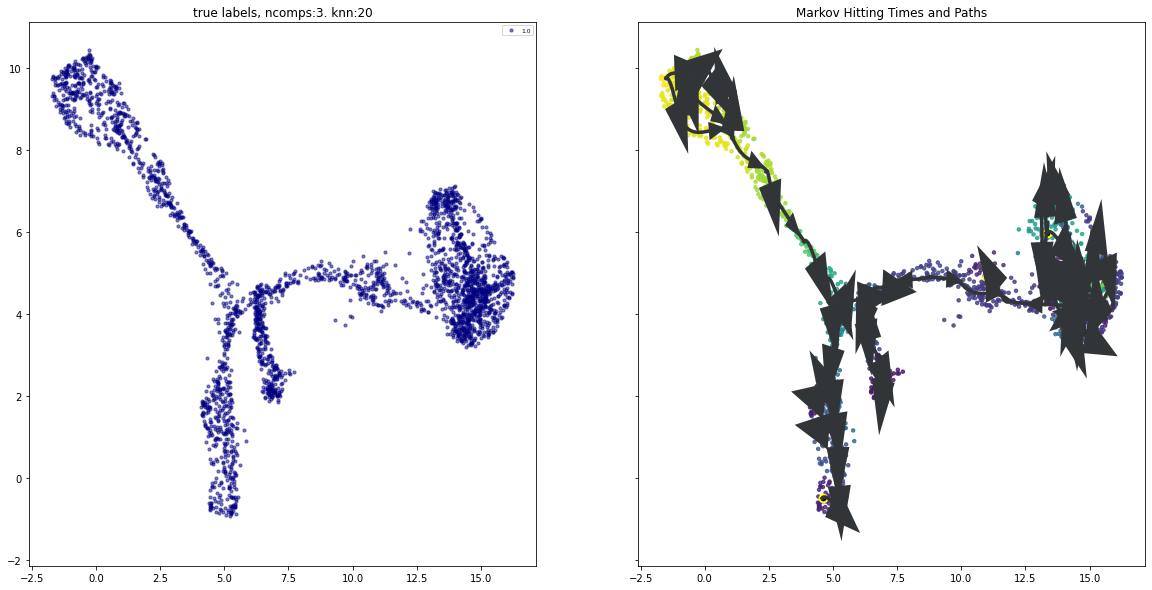

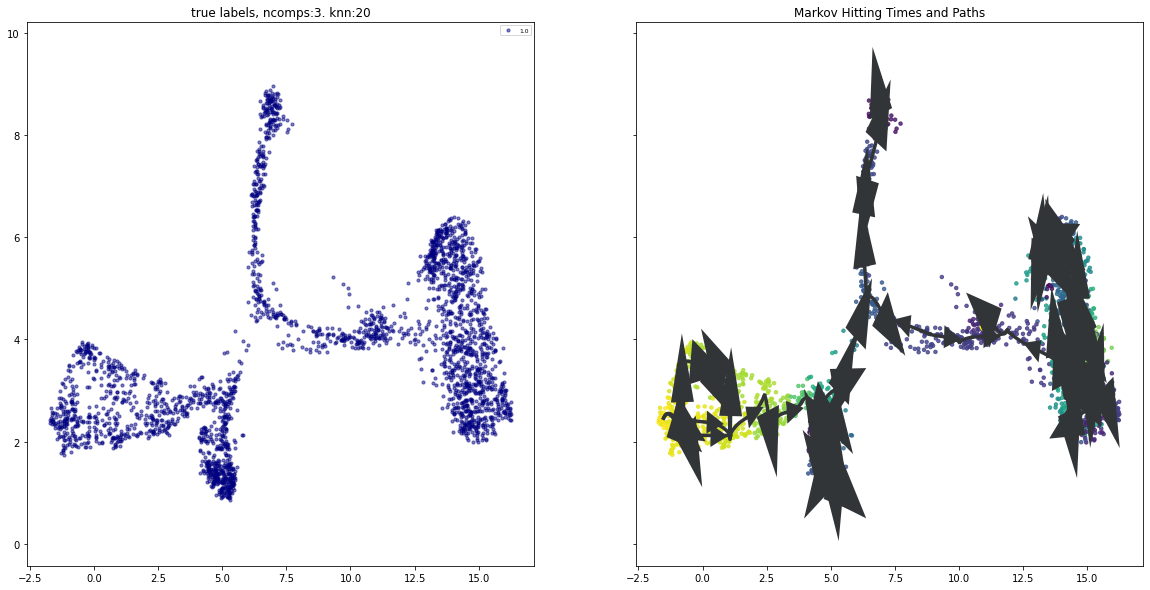

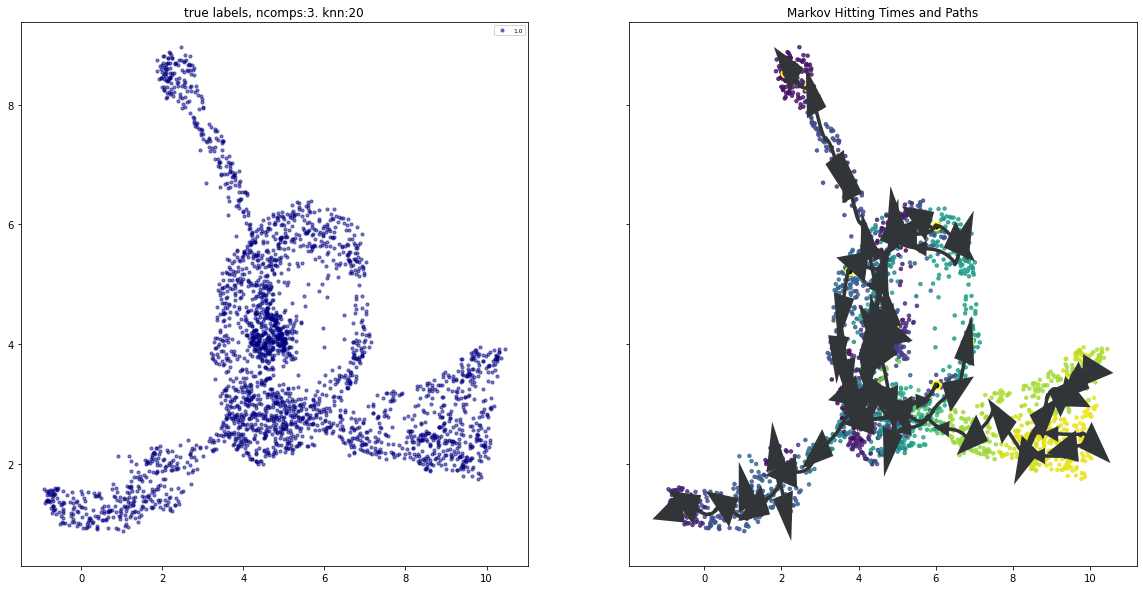

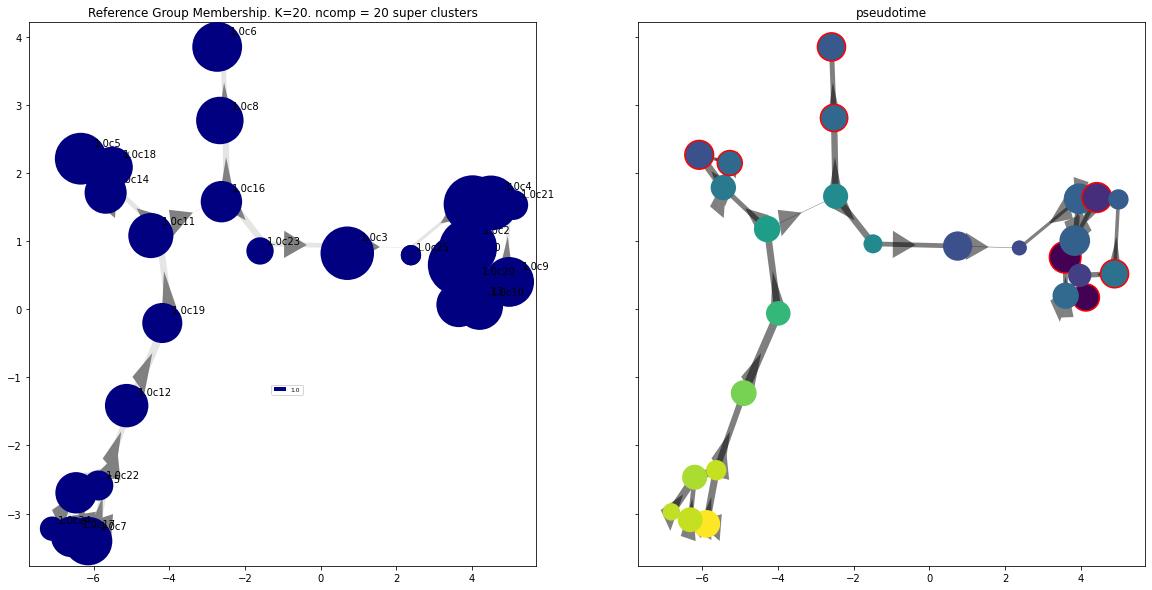

time elapsed 22.0 seconds
input data has shape 2726 (samples) x 20 (features)
time is Wed Dec  8 14:55:20 2021
commencing global pruning
Share of edges kept after Global Pruning 49.80 %
commencing community detection
time is Wed Dec  8 14:55:21 2021
98  clusters before handling small/big
There are 0 clusters that are too big
humanCD34 : global cluster graph pruning level 0.15
number of components before pruning 1
percentage links trimmed from local pruning relative to start 0.0
percentage links trimmed from global pruning relative to start 65.0
there are  1 components in the graph
root user [0]
start computing lazy-teleporting Expected Hitting Times
ended all multiprocesses, will retrieve and reshape
super_terminal_clusters [0, 4, 5, 6, 8, 9, 10, 18]
no sub cluster has majority made of super-cluster  0
terminal clus in this component [0, 4, 5, 6, 8, 9, 11, 18]
final terminal clus [0, 4, 5, 6, 8, 9, 11, 18]
From root 7  to Terminal state 0 is found 84  times.
From root 7  to Terminal st

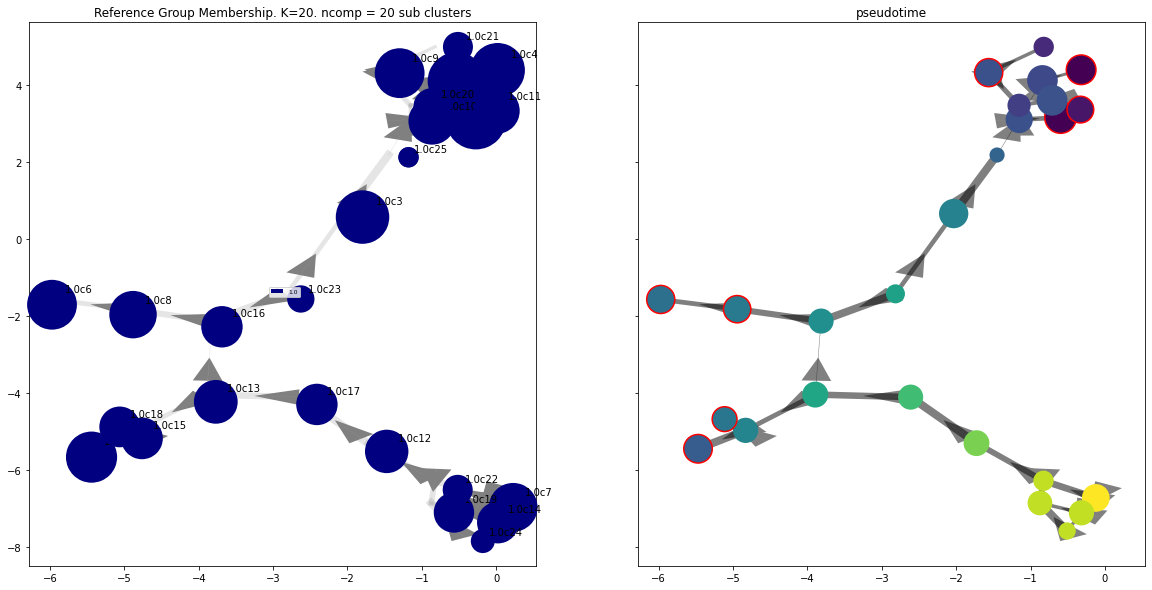

time elapsed 18.1 seconds
dict of terminal state pairs, Super: sub:  {0: 0, 4: 4, 5: 5, 6: 6, 8: 8, 9: 9, 10: 11, 18: 18}


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 0 is a super terminal with sub_terminal cluster 0
super cluster 4 is a super terminal with sub_terminal cluster 4
super cluster 5 is a super terminal with sub_terminal cluster 5
super cluster 6 is a super terminal with sub_terminal cluster 6
super cluster 8 is a super terminal with sub_terminal cluster 8
super cluster 9 is a super terminal with sub_terminal cluster 9
super cluster 10 is a super terminal with sub_terminal cluster 11
super cluster 18 is a super terminal with sub_terminal cluster 18


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 0 is a super terminal with sub_terminal cluster 0
super cluster 4 is a super terminal with sub_terminal cluster 4
super cluster 5 is a super terminal with sub_terminal cluster 5
super cluster 6 is a super terminal with sub_terminal cluster 6
super cluster 8 is a super terminal with sub_terminal cluster 8
super cluster 9 is a super terminal with sub_terminal cluster 9
super cluster 10 is a super terminal with sub_terminal cluster 11
super cluster 18 is a super terminal with sub_terminal cluster 18


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 0 is a super terminal with sub_terminal cluster 0
super cluster 4 is a super terminal with sub_terminal cluster 4
super cluster 5 is a super terminal with sub_terminal cluster 5
super cluster 6 is a super terminal with sub_terminal cluster 6
super cluster 8 is a super terminal with sub_terminal cluster 8
super cluster 9 is a super terminal with sub_terminal cluster 9
super cluster 10 is a super terminal with sub_terminal cluster 11
super cluster 18 is a super terminal with sub_terminal cluster 18
Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...
Constructing tree 1 of 1 / Subset 1 of 1
Computing EPG with  50  nodes on  2726  points and  3  dimensions

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||21	2.1129	21	20	13	3	0	0	0.9731	0.8755	0.9759	0.9783	0.8629	0.2769	5.8141	122.0971	0
3||22	2.0213	22	21	14	3	0	0	0.951	0.8626	0.9764	0.9786	0.8016	0.2686	5.9087	1

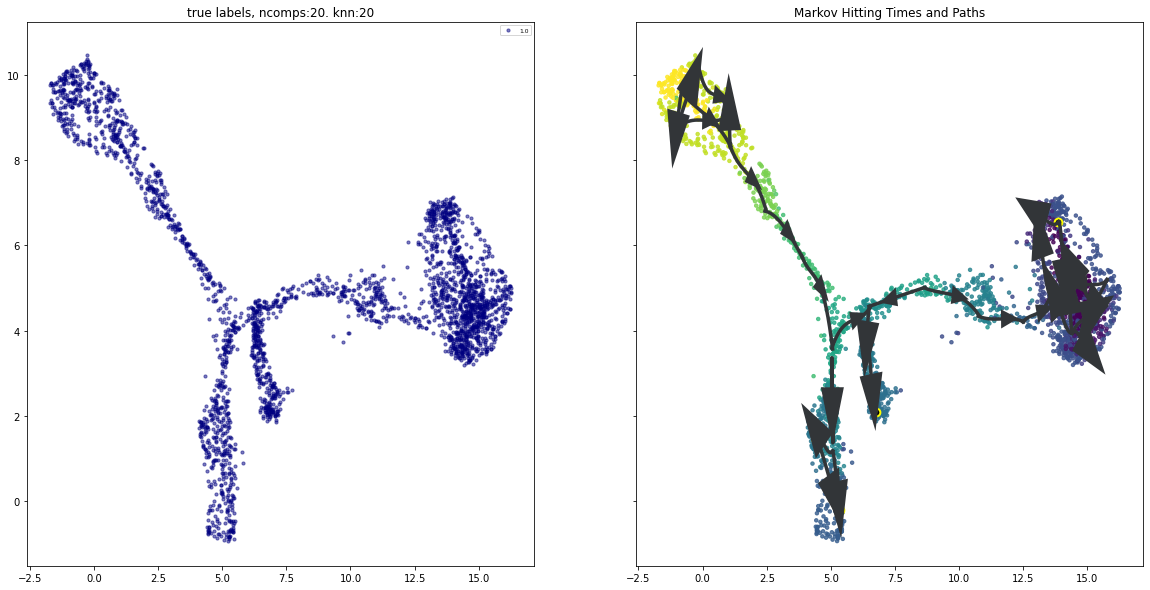

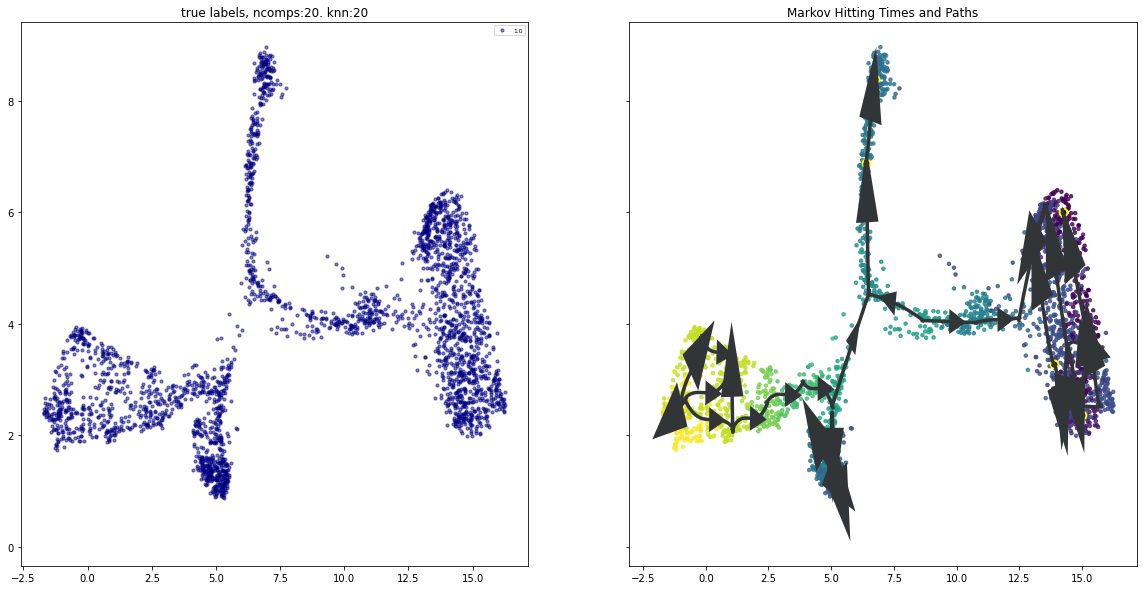

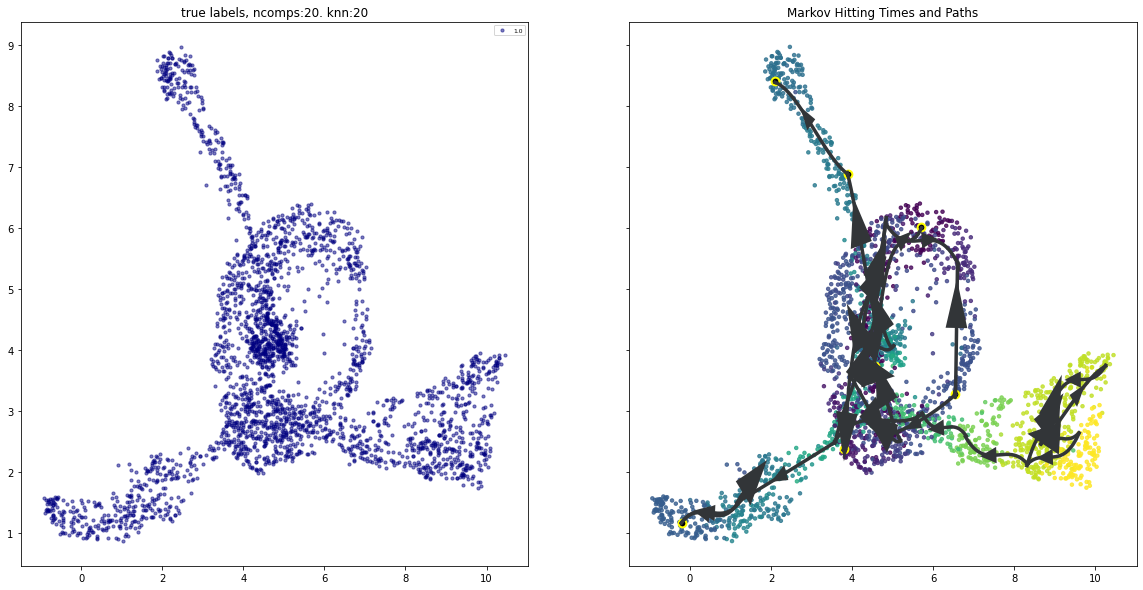

In [3]:
#default results
(slingshot_lineages, 
 mcle_nodep, mcle_stree, mcle_edges, 
 mcle_partitions, mcle_clusters) = run_monocle_slingshot_tuned(data_path, slingshot_ncenters = 50, 
                                                         mcle_ncenters = 50, mcle_sigma = 0.01, 
                                                         mcle_gamma = 0.5, mcle_eps = 1e-05,res_path='R_outputs/retina/')

((via_out, via_projected_sc_pt, 
 (loci, c_edge, width_edge, pen_color, dot_size)),
 (via_out2, via_projected_sc_pt2,
 (loci2, c_edge2, width_edge2, pen_color2, dot_size2)),
 (via_out3, via_projected_sc_pt3,
 (loci3, c_edge3, width_edge3, pen_color3, dot_size3)),) = run_VIA(X,X,labels=None,root_user = [0], 
                                                            v0_too_big = 0.3 , v1_too_big = 0.1, v0_random_seed = 42, 
                                                            knn = 20,ncomps=3)

((via_out_pca, via_projected_sc_pt_pca, 
 (loci_pca, c_edge_pca, width_edge_pca, pen_color_pca, dot_size_pca)),
 (via_out2_pca, via_projected_sc_pt2_pca,
 (loci2_pca, c_edge2_pca, width_edge2_pca, pen_color2_pca, dot_size2_pca)),
 (via_out3_pca, via_projected_sc_pt3_pca,
 (loci3_pca, c_edge3_pca, width_edge3_pca, pen_color3_pca, dot_size3_pca)),) = run_VIA(_anndata.obsm['X_pca'],X,labels=None,root_user = [0], 
                                                            v0_too_big = 0.3 , v1_too_big = 0.1, v0_random_seed = 42, 
                                                            knn = 20,ncomps=20)

paga_nodep, paga_edges, paga_weights = run_paga(_anndata,X,resolution=1)

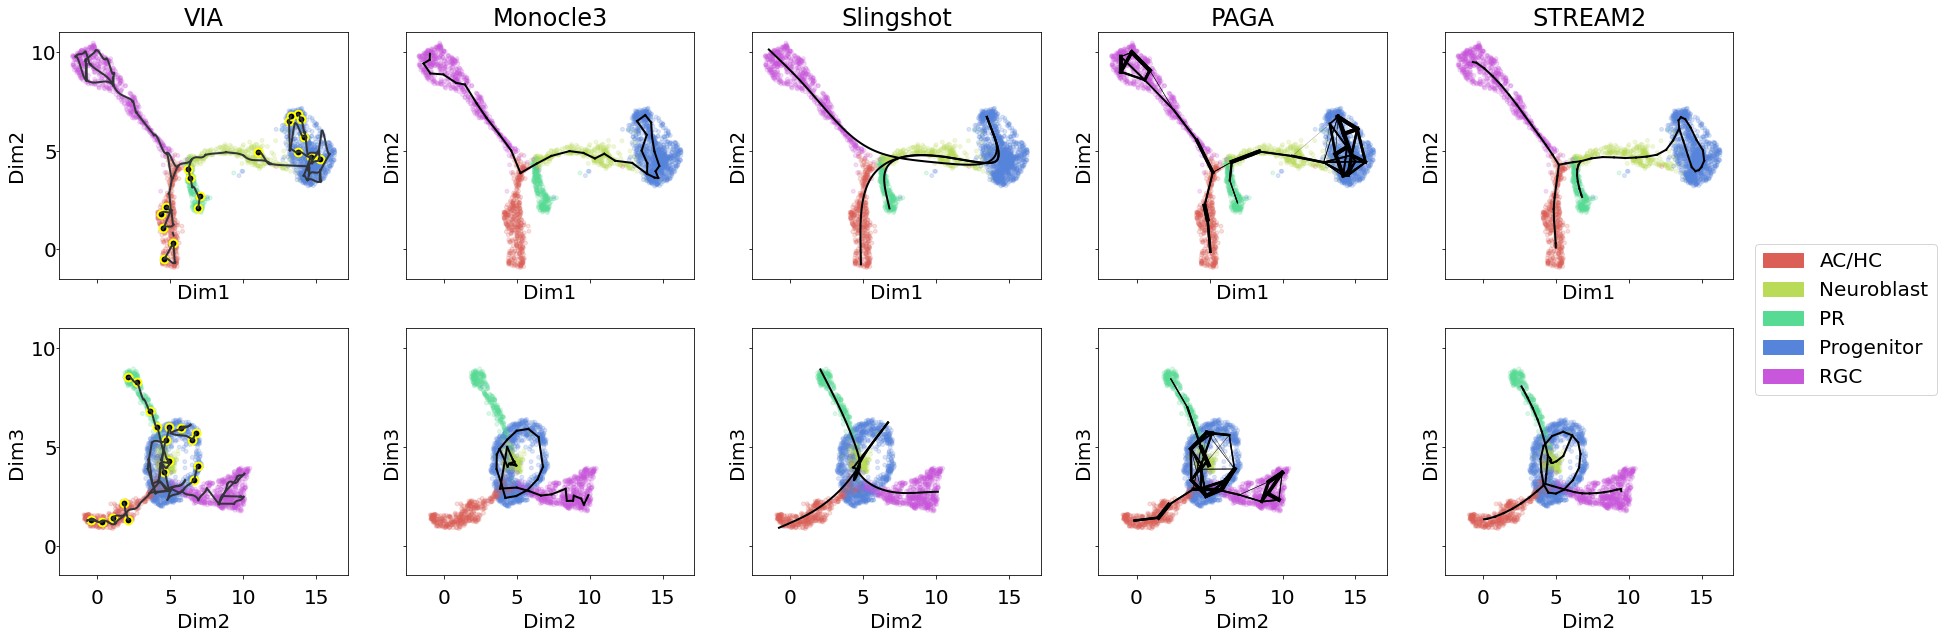

In [98]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(2,5,figsize=(30,10),sharey=True,sharex=True)
axs=axs.flat
X_plot=X
linewidth=2

def labels_to_color(labels):
    '''Turn a list of labels into a list of colors'''
    import seaborn as sns
    import matplotlib.patches as mpatches
    unique_labels = np.unique(labels)
    colors = sns.color_palette('hls', len(unique_labels))

    # Associate each sample with a color indicating its type
    idx = np.zeros(len(labels)).astype(int)
    legend = []
    for i in range(len(unique_labels)):
        idx[labels == unique_labels[i]] = i
        legend.append(mpatches.Patch(color=colors[i], label=unique_labels[i]))
                       
    col = [colors[i] for i in idx]
    return col, legend, unique_labels
c_plot, legend, unique_labels = labels_to_color(_anndata.obs['Annotation'])

def init_subplot(d1=0,d2=2):
    ax = next(axs)
    ax.set_xlabel(f'Dim{d1+1}',labelpad=5)
    ax.set_ylabel(f'Dim{d2+1}',labelpad=5)
    ax.locator_params(axis='x',nbins=4)
    ax.locator_params(axis='y',nbins=4)
    ax.tick_params(axis="x",pad=10)
    ax.tick_params(axis="y",pad=-1)
    _=ax.scatter(X_plot[:,d1],X_plot[:,d2],c=c_plot,s=15,alpha=.2)
    return ax,_

for i0,(d1,d2) in enumerate(((0,1),(1,2))):

    #via
    ax,_=init_subplot(d1,d2)
    if i0==0: 
        ax.set_title('VIA')
        via_plot=via_out
        (loci_plot, c_edge_plot, width_edge_plot, pen_color_plot, dot_size_plot)=(loci, c_edge, width_edge,  pen_color, dot_size)
    else: 
        via_plot=via_out3
        (loci_plot, c_edge_plot, width_edge_plot, pen_color_plot, dot_size_plot)=(loci3, c_edge3, width_edge3, pen_color3, dot_size3)
    for i in range(len(via_out)): 
        ax.plot(via_plot[i][0], via_plot[i][1], linewidth=linewidth, c='#323538')#1.5

        direction_arrow=via_plot[i][2]; head_width=via_out[i][3]
        if direction_arrow == 1:
            ax.arrow(via_plot[i][4], via_plot[i][5], via_plot[i][6], via_plot[i][7], shape='full', lw=0, length_includes_head=False,
                      head_width=.03, color='#323538')  
    count_ = 0
    for i, c_e, w, pc, dsz in zip(loci, c_edge, width_edge, pen_color, dot_size):  # sc_supercluster_nn
        ax.scatter(X[i, d1], X[i, d2], c='black', s=dsz, edgecolors=c_e, linewidth=w)
        count_ = count_ + 1

    #monocle
    ax,_=init_subplot(d1,d2)
    if i0==0: ax.set_title('Monocle3')
    for e in mcle_edges:
        curve_i = np.concatenate((mcle_nodep[[e[0]]], mcle_nodep[[e[1]]]),axis=0).T
        ax.plot(curve_i[d1], curve_i[d2], c='k',linewidth=linewidth)

    #slingshot
    ax,_=init_subplot(d1,d2)
    if i0==0: ax.set_title('Slingshot')
    for l in slingshot_lineages['GMM']:
        curve_i = l.T
        ax.plot(curve_i[d1], curve_i[d2], c='k',linewidth=linewidth)

    #paga
    ax,_=init_subplot(d1,d2)
    if i0==0: ax.set_title('PAGA')
    for e,w in zip(paga_edges,paga_weights):
        curve_i = np.concatenate((paga_nodep[[e[0]]], paga_nodep[[e[1]]]),axis=0).T
        ax.plot(curve_i[d1], curve_i[d2], c='k',linewidth=2*linewidth*w)

    #epg
    ax,_=init_subplot(d1,d2)
    if i0==0: ax.set_title('STREAM2')
    for edge_i in edges:
        curve_i = np.concatenate((nodep[[edge_i[0]]], nodep[[edge_i[1]]]),axis=0).T
        ax.plot(curve_i[d1], curve_i[d2], c='k',linewidth=linewidth)

#fig.tight_layout()
#fig.subplots_adjust(right=0.82)
fig.legend(legend, unique_labels, loc = 'center right')
plt.savefig('figures/retina_default_2d.png',dpi=300,bbox_inches='tight')